In [1]:
import os
import random
import imgaug.augmenters as iaa 
import cv2 as cv
import matplotlib.pyplot as plt
import skimage.io as sk

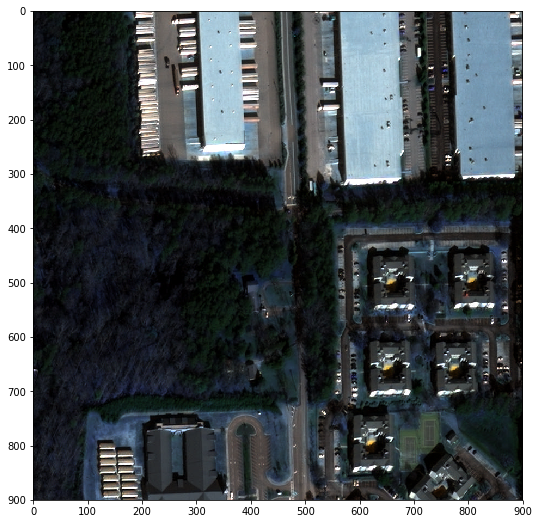

In [2]:
IMG_LIB = "./test_images//"
img_files = os.listdir(IMG_LIB)
img_file = random.choice(img_files)

im = plt.imread(os.path.join(IMG_LIB,img_file))
plt.figure(figsize=(9,9))
plt.imshow(im)

In [28]:
seq = iaa.Sometimes(0.833, iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Flipud(0.5),
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Rot90([1,2,3,4]),
    
    iaa.Sequential([iaa.ChangeColorspace(from_colorspace="RGB", to_colorspace="HSV"),
                    iaa.Sometimes(0.8,iaa.SomeOf((0,None),[
                        iaa.WithChannels(0, iaa.Add((50, 100))),
                        iaa.WithChannels(1, iaa.Add((50, 100))),
                        iaa.WithChannels(2, iaa.Add((55, 75)))])),
                    
                    iaa.ChangeColorspace(from_colorspace="HSV", to_colorspace="RGB")]),
                    
    iaa.Dropout(p=(0, 0.05), per_channel=0.7)
    
], random_order=True)) # apply augmenters in random order

In [29]:
img_aug = seq.augment_image(im)

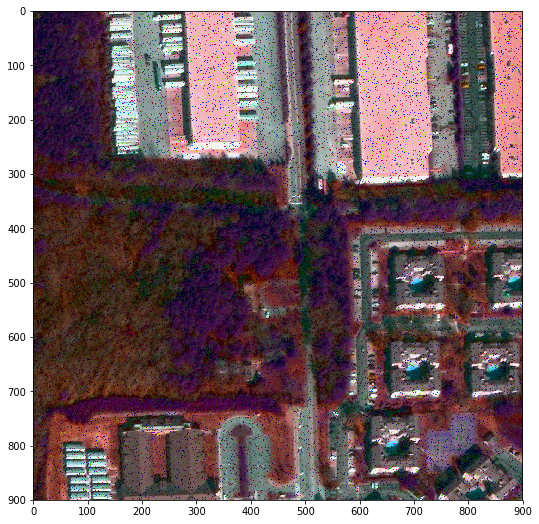

In [30]:
plt.figure(figsize=(9,9))
plt.imshow(img_aug)